In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

In [46]:
data = pd.read_csv("/content/exchange_rate.csv")

In [47]:
data.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [48]:
data.shape

(7588, 2)

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB


In [50]:
data.isnull().sum()

,0
date,0
Ex_rate,0


In [62]:
data['date'].unique()

array(['01-01-1990 00:00', '02-01-1990 00:00', '03-01-1990 00:00', ...,
       '08-10-2010 00:00', '09-10-2010 00:00', '10-10-2010 00:00'],
      dtype=object)

In [63]:
data['date'].nunique()

7588

In [51]:
import altair as alt

# Increase the maximum number of rows
alt.data_transformers.enable('default', max_rows=10000)  # Set to a value that accommodates your dataset

# Create the time series plot (rest of your code remains the same)
chart = alt.Chart(data).mark_line().encode(
    x='date:T',
    y='Ex_rate:Q'
).properties(
    title='Currency Exchange Rate Time Series'
)
chart

/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


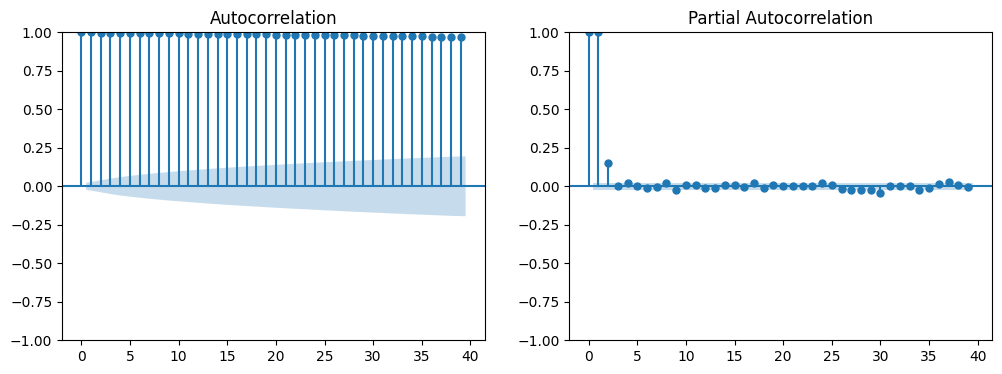

In [52]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming 'Ex_rate' column contains exchange rates for a single currency
currency_data = data['Ex_rate']

# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(currency_data, ax=axes[0])
plot_pacf(currency_data, ax=axes[1])
plt.show()

In [53]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming you've identified (p, d, q) as the optimal ARIMA parameters
p = 1  # Replace with your chosen value
d = 1  # Replace with your chosen value
q = 1  # Replace with your chosen value

# Fit the ARIMA model
model1 = ARIMA(currency_data, order=(p, d, q))
model_fit = model1.fit()

# Print model summary
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Sat, 10 Aug 2024   AIC                         -56102.322
Time:                        15:33:26   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

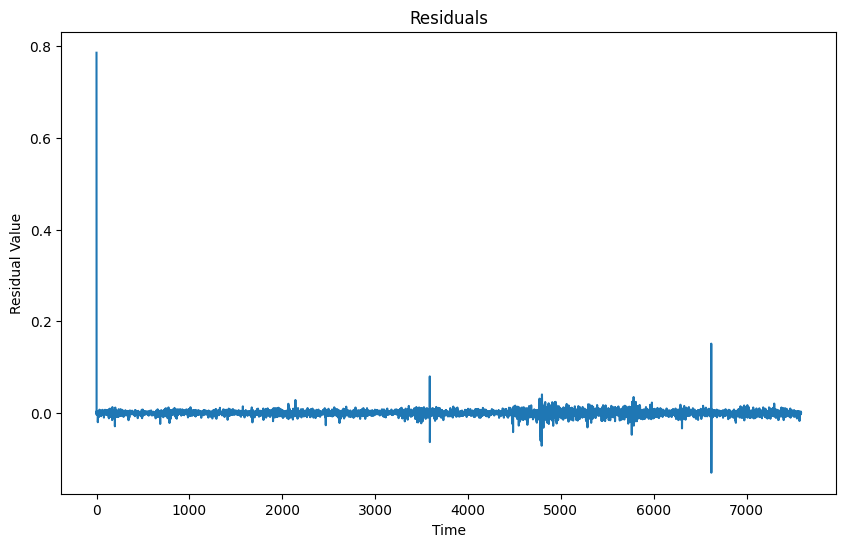

    lb_stat  lb_pvalue
10  1.81673   0.997562
ShapiroResult(statistic=0.2825677424742139, pvalue=4.283183913162518e-99)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7588.
  res = hypotest_fun_out(*samples, **kwds)


In [54]:
# Assuming 'model_fit' is your fitted ARIMA model
residuals = model_fit.resid

# Plot residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals')
plt.xlabel('Time')
plt.ylabel('Residual Value')
plt.show()

# Perform statistical tests on residuals
from statsmodels.stats.diagnostic import acorr_ljungbox

# Ljung-Box test for autocorrelation
ljung_box_result = acorr_ljungbox(residuals, lags=[10])  # Adjust lags as needed
print(ljung_box_result)

# Check for normality of residuals (optional)
from scipy.stats import shapiro
shapiro_result = shapiro(residuals)
print(shapiro_result)

# ARIMA

In [55]:
# Forecast
train = data['Ex_rate'][:int(0.8*len(data))]
test = data['Ex_rate'][int(0.8*len(data)):]

model = ARIMA(train, order=(1,1,1))
fitted = model.fit()

# Forecast
fc = fitted.forecast(steps=len(test))
fc_series = pd.Series(fc, index=test.index)

In [56]:
# Calculate RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(test, fc)
rmse = sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 0.2054366965966928


# HOLT'S LINEAR

In [58]:
from statsmodels.tsa.holtwinters import Holt

# Fit Holt's Linear Model
holt_model = Holt(train).fit()

# Forecast
holt_fc = holt_model.forecast(steps=len(test))

# Calculate RMSE
holt_mse = mean_squared_error(test, holt_fc)
holt_rmse = sqrt(holt_mse)
print(f'Holt\'s Linear Model RMSE: {holt_rmse}')


Holt's Linear Model RMSE: 0.23716278259394408


# HOLT'S WINTER

In [59]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit Holt-Winters' Model
hw_model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12).fit()  # Adjust seasonal_periods if needed

# Forecast
hw_fc = hw_model.forecast(steps=len(test))

# Calculate RMSE
hw_mse = mean_squared_error(test, hw_fc)
hw_rmse = sqrt(hw_mse)
print(f'Holt-Winters\' Model RMSE: {hw_rmse}')


Holt-Winters' Model RMSE: 0.23928931038324866


# COMPARISON

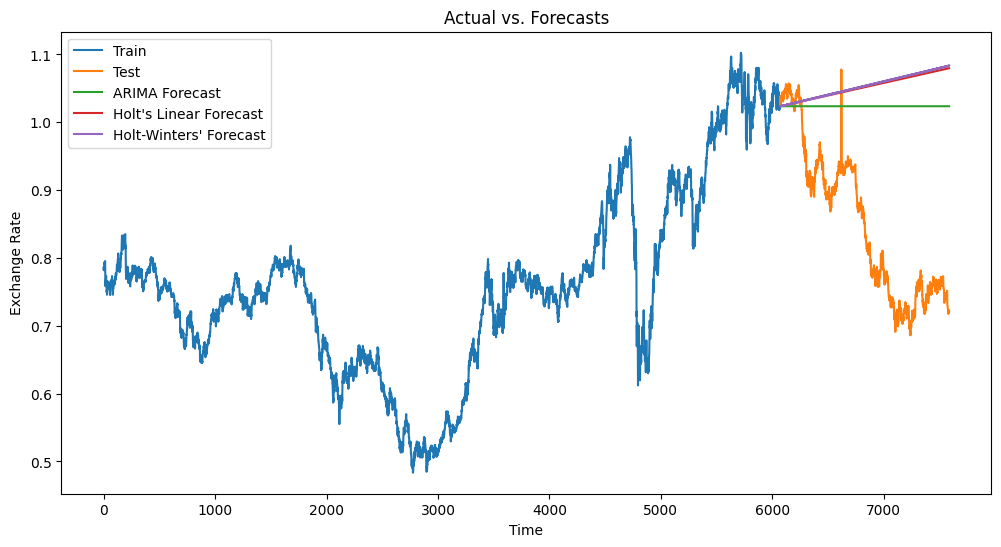

In [60]:
import matplotlib.pyplot as plt
# Plot actual vs. forecasts
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(fc_series.index, fc_series, label='ARIMA Forecast')
plt.plot(test.index, holt_fc, label='Holt\'s Linear Forecast')
plt.plot(test.index, hw_fc, label='Holt-Winters\' Forecast')
plt.legend()
plt.title('Actual vs. Forecasts')
plt.xlabel('Time')
plt.ylabel('Exchange Rate')
plt.show()


# CONCLUSION

**RMSE OF EACH MODEL**

* ARIMA : 0.2054
* HOLT'S LINEAR : 0.2371  
* HOLT'S WINTER : 0.23928

**ARIMA IS OUTPERFORMING EVERY OTHER MODEL.**